In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import scipy.integrate as integrate
import mpmath as mp

In [9]:
## Random number Generate and save as file
def Random_number(N = 25,num = 500000):
    output = np.zeros(num)
    for i in range(num):
        output[i] = np.random.randint(N)
    output2 = np.zeros(num)
    for i in range(num):
        output2[i] = np.random.rand()

    pd.DataFrame(output).to_csv('RandInt'+str(N)+'_'+str(num)+'.csv')
    pd.DataFrame(output2).to_csv('RandDoub_'+str(num)+'.csv')

# Random_number()

In [19]:
def C(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    K1, _ = integrate.quad(lambda x: 1/np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    E1, _ = integrate.quad(lambda x: np.sqrt(1-k**2*np.sin(x)**2),0,np.pi/2)
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

def C2(T,J=1):
    b = 1/T
    Tc = 2/np.log(1+np.sqrt(2))
    return -2/np.pi*(2*J*b)**2*np.log(np.abs(1-T/Tc))   

def C3(T,J=1):
    b = 1/T #beta
    k = 2*np.sinh(2*b*J)/(np.cosh(2*b*J)**2)   #kappa
    mp.mp.dps = 50
    K1 = mp.quad(lambda x: 1/mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    E1 = mp.quad(lambda x: mp.sqrt(1-k**2*mp.sin(x)**2),[0,mp.pi/2])
    tanh = np.tanh(2*b*J)
    return 4/np.pi*((b*J/tanh)**2)*(K1-E1-(1-tanh**2)*(np.pi/2+(2*tanh**2-1)*K1)) # boltzman k = 1

_Ebin = 100
ExactT = np.zeros(_Ebin)
Exactm = np.zeros_like(ExactT)

Critical_Temp = 2/np.log(1+np.sqrt(2))

for i in range(len(Exactm)):
    ExactT[i] = (Critical_Temp-0.01)/_Ebin*(i+1)
    Exactm[i] = (1-np.sinh(2*(1/ExactT[i]))**-4)**(1/8)

ExactT = np.append(ExactT,Critical_Temp)
Exactm = np.append(Exactm,0)

_Ebin2 = 200
ExactT2 = np.zeros(_Ebin2)
ExactC = np.zeros_like(ExactT2)

for i in range(len(ExactC)):
    ExactT2[i] = 5/_Ebin2*(i+1)
    ExactC[i] = C(ExactT2[i]) 


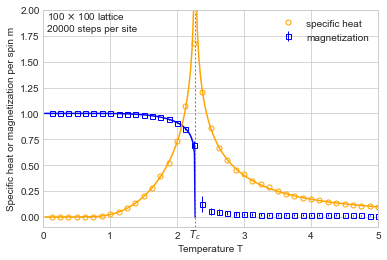

In [205]:
a = pd.read_csv("../C++/Result/Sample.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

plt.style.use('seaborn-whitegrid')
plt.rcParams['text.usetex'] = False

plt.ylim(-0.1,2)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')


plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"100 $\\times$ 100 lattice")
plt.text(0.05,1.79,"20000 steps per site")
plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

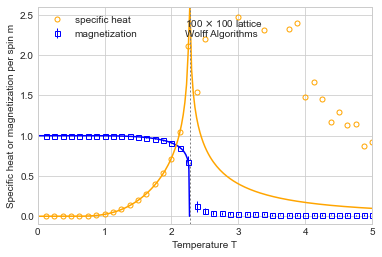

In [237]:
a = pd.read_csv("../C++/Result/Wolff_c_100_int40_2.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))

plt.style.use('seaborn-whitegrid')
plt.rcParams['text.usetex'] = False

plt.ylim(-0.1,2.6)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.plot(T2,C2,linestyle='', marker='o', markersize=5, color='orange', label='specific heat',mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')


plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(2.202,2.35,"100 $\\times$ 100 lattice")
plt.text(2.203,2.23,"Wolff Algorithms")
# plt.text(0.05,1.79,"20000 steps per site")
# plt.text(2.27, -0.2, '$T_c$', ha='center')


plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

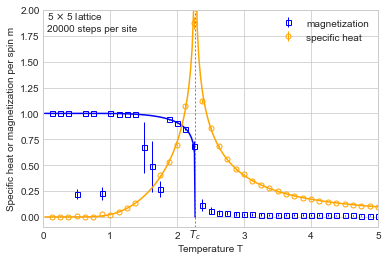

In [188]:
a = pd.read_csv("../C++/Result/Metropolis_c_100_int40_1.csv")
T2 = a.iloc[:,1].values
M2 = a.iloc[:,2].values
C2 = a.iloc[:,3].values
M2error = np.sqrt(1/(20000)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))
C2error = a.iloc[:,9].values

plt.style.use('seaborn-whitegrid')

plt.ylim(-0.1,2)
plt.xlim(0,5)
plt.errorbar(T2,M2,yerr=M2error, lw=1, linestyle='', marker='s', markersize=5, color='b', label='magnetization',mfc='none')
plt.errorbar(T2,C2,yerr=C2error, lw=1,linestyle='', marker='o', markersize=5, color='orange', label='specific heat', mfc='none')
plt.plot(ExactT,Exactm, color='b')
plt.plot(ExactT2,ExactC, color='orange')

plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.legend()
plt.text(0.05,1.91,"5 $\\times$ 5 lattice")
plt.text(0.05,1.79,"20000 steps per site")
plt.text(2.27, -0.2, '$T_c$', ha='center')

plt.ylabel('Specific heat or magnetization per spin m')
plt.xlabel('Temperature T')
plt.show()

In [183]:
a

,idx,temperture,magnetization,specific heat,abs(sigma),sigma**2,sigma**4,HH,HH**2,c_dev(bootstrap)
0,0,0.125,1.000000,0.000000,25.0000,625.0000,390625.0000,-50.0000,2500.0000,0.000000
1,1,0.250,1.000000,0.000000,25.0000,625.0000,390625.0000,-50.0000,2500.0000,0.000000
2,2,0.375,1.000000,0.000000,25.0000,625.0000,390625.0000,-50.0000,2500.0000,0.000000
3,3,0.500,1.000000,0.000000,25.0000,625.0000,390625.0000,-50.0000,2500.0000,0.000000
4,4,0.625,0.999992,0.000655,24.9998,624.9904,390613.9216,-49.9992,2499.9264,0.000454
5,5,0.750,0.999956,0.002502,24.9989,624.9472,390564.0688,-49.9956,2499.5952,0.000877
6,6,0.875,0.999788,0.008837,24.9947,624.7456,390331.4224,-49.9788,2498.0496,0.001113
7,7,1.000,0.999128,0.027900,24.9782,623.9572,389428.8952,-49.9146,2492.1648,0.001805
8,8,1.125,0.998324,0.043035,24.9581,622.9972,388330.3480,-49.8352,2484.9088,0.002250
9,9,1.250,0.995900,0.086865,24.8975,620.1380,385126.6520,-49.6106,2464.6048,0.003567


(-0.1, 1.0)

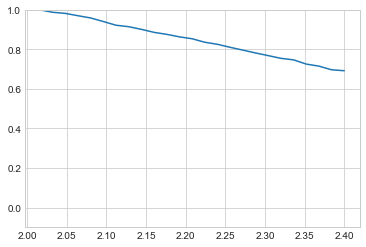

In [148]:
lat_size = a.iloc[:,8].values
plt.style.use('seaborn-whitegrid')
plt.plot(T2,lat_size/max(lat_size))
plt.ylim(-0.1,1)

In [127]:
Merror = np.sqrt(1/(18000-1)*abs(a.iloc[:,5].values/10000-(a.iloc[:,4].values/100)**2))
Merror

array([4.53384189e-07, 4.53384189e-07, 4.53384189e-07, 3.36860302e-06,
       2.59801280e-05, 7.30765067e-05, 1.61982524e-04, 2.98699767e-04,
       4.78846715e-04, 7.42169110e-04, 1.07817314e-03, 1.50389705e-03,
       2.09146483e-03, 2.92261752e-03, 4.15729168e-03, 6.58373175e-03,
       1.63664923e-02, 3.84328129e-02, 7.69305470e-02, 3.04441134e-02,
       2.64140385e-02, 1.98239127e-02, 1.74707158e-02, 1.48068023e-02,
       1.38107134e-02, 1.27539642e-02, 1.17285825e-02, 1.11081934e-02,
       1.05680235e-02, 9.89998332e-03, 9.51637581e-03, 9.39641766e-03,
       8.96897633e-03, 8.72133501e-03, 8.60393545e-03, 8.28127893e-03,
       8.03640007e-03, 7.97855875e-03, 7.78998789e-03, 7.51684202e-03])

In [28]:
b = pd.read_csv("Metropolis_python.csv")
T3 = b.iloc[:,1].values
M3 = b.iloc[:,2].values
C3 = b.iloc[:,3].values

In [4]:
L24 = pd.read_csv("../C++/Result/Wolff_c_24_int25_1.csv")
L24

,Unnamed: 0,temperture,magnetization,specific heat,abs(sigma),sigma**2,HH,HH**2,sigma**4
0,2.206,0.780910,1.523176,449.804,207472.848,-36.930833,1371.298889,1371.298889,2.293401e+07
1,2.212,0.753502,1.634493,434.017,195744.542,-36.305917,1326.117069,1326.117069,2.090631e+07
2,2.218,0.757653,1.501430,436.408,197182.024,-36.455583,1336.395875,1336.395875,2.114008e+07
3,2.224,0.754196,1.412029,434.417,195138.566,-36.211000,1318.220667,1318.220667,2.064852e+07
4,2.230,0.734642,1.547337,423.154,186903.252,-35.904917,1296.857792,1296.857792,1.931246e+07
5,2.236,0.754434,1.563239,434.554,195555.236,-36.228167,1320.295778,1320.295778,2.076157e+07
6,2.242,0.722337,1.768742,416.066,181437.056,-35.441333,1264.978806,1264.978806,1.835680e+07
7,2.248,0.710613,1.700138,409.313,176477.546,-35.312000,1255.529000,1255.529000,1.760011e+07
8,2.254,0.705241,1.589021,406.219,175158.610,-35.323083,1255.793264,1255.793264,1.749992e+07
9,2.260,0.691177,1.596780,398.118,168453.724,-34.852250,1222.835042,1222.835042,1.628815e+07


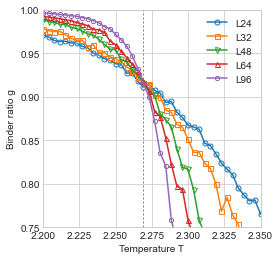

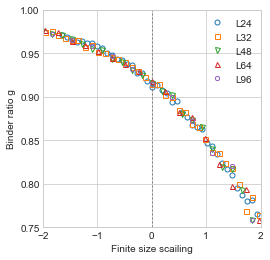

In [170]:
L24 = pd.read_csv("../C++/Result/Binder/Wolff_c_24_int40_1.csv")
L32 = pd.read_csv("../C++/Result/Binder/Wolff_c_32_int40_1.csv")
L48 = pd.read_csv("../C++/Result/Binder/Wolff_c_48_int40_1.csv")
L64 = pd.read_csv("../C++/Result/Binder/Wolff_c_64_int40_1.csv")
L96 = pd.read_csv("../C++/Result/Binder/Wolff_c_96_int40_1.csv")
Llist = [L24,L32,L48,L64,L96]
# Llist = [L24,L32,L48]
Lname = ["L24","L32","L48","L64","L96"]
Lsize = [24,32,48,64,96]
Llen = 5
marker = ["o","s","v","^","8"]
T2 = L24.iloc[:,1].values
Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]

plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylim(0.75,1)
plt.xlim(2.2,2.35)
for i in range(Llen):
    plt.plot(T2,Binder[i],marker=marker[i],markersize=5,mfc='none',label=Lname[i])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')

plt.legend()
plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])
plt.ylabel('Binder ratio g')
plt.xlabel('Temperature T')
# plt.text(2.265,0.748, '$T_c$')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ylim(0.75,1)
plt.xlim(-2,2)
T22 = T2-2/np.log(1+np.sqrt(2))
for i in range(Llen):
    plt.plot(T22*Lsize[i],Binder[i],linestyle="",marker=marker[i],markersize=5,mfc='none',label=Lname[i])
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.legend()
plt.axvline(x=0,c='grey',lw=1,dashes=[2,2])
plt.ylabel('Binder ratio g')
plt.xlabel('Finite size scailing')
# plt.xlabel('$L^{1/\nu}[T-T_c]$')
plt.show()

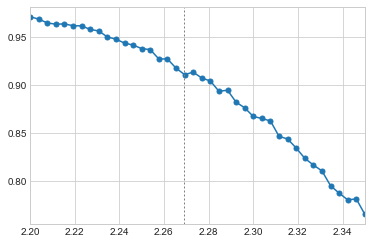

In [95]:
L5 = pd.read_csv("../C++/Result/Wolff_c_24_int40_3.csv")
# L5 = pd.read_csv("../C++/Result/Exact_c_5_int40_1.csv")
Llist = [L5]
T2 = L5.iloc[:,1].values
Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]
plt.style.use('seaborn-whitegrid')

# plt.ylim(-0.1,2)
plt.xlim(2.2,2.35)
marker = ["o","s","o","s","o"]
for i in range(1):
    plt.plot(T2,Binder[i],marker=marker[i],markersize=5)

plt.axvline(x=2/np.log(1+np.sqrt(2)),c='grey',lw=1,dashes=[2,2])

plt.show()

In [83]:
L52

,idx,temperture,magnetization,specific heat,abs(sigma),sigma**2,sigma**4,HH,HH**2,ZM,Z
0,0,0.2,1.000000,0.000000,25.000000,625.000000,390625.000000,-50.000000,2500.000000,9366136536256683223128636230603789192093362411...,3746454614502673393547696480567203293781764211...
1,1,0.4,1.000000,0.000001,25.000000,624.999995,390624.994291,-50.000000,2499.999962,4838940334505704677466037773821797774899379225...,1935576141782760859624473488997704281175475710...
2,2,0.6,0.999997,0.000290,24.999919,624.996094,390620.494081,-49.999675,2499.970090,38829611863786824501346879158196633600.000000,1553189531383403053779715220022755328.000000
3,3,0.8,0.999907,0.004681,24.997667,624.888154,390496.204712,-49.990733,2499.148257,34818035704597461986952871936.000000,1392851408315264406684434432.000000
4,4,1.0,0.999276,0.023380,24.981893,624.134231,389632.514107,-49.929004,2493.489970,130656464123294916804608.000000,5230046558916618223616.000000
5,5,1.2,0.997025,0.067195,24.925615,621.463361,386607.647131,-49.714875,2473.987791,32147040577412476928.000000,1289719031414027520.000000
6,6,1.4,0.991365,0.144343,24.784135,614.852047,379289.788383,-49.201548,2427.865078,88158039324797552.000000,3557035153396284.500000
7,7,1.6,0.979468,0.263793,24.486690,601.385547,364995.591679,-48.201175,2340.236027,1118864457418173.375000,45692760968096.421875
8,8,1.8,0.956580,0.436149,23.914510,576.863645,340651.360131,-46.474668,2195.222779,40517837105471.828125,1694278403235.151611
9,9,2.0,0.915732,0.653909,22.893308,536.230869,303734.339949,-43.760522,1980.374197,3138873693342.156738,137108784510.282761


In [84]:
L5

,Unnamed: 0,temperture,magnetization,specific heat,abs(sigma),sigma**2,HH,HH**2,sigma**4
0,2.206,0.780910,1.523176,449.804,207472.848,-36.930833,1371.298889,1371.298889,2.293401e+07
1,2.212,0.753502,1.634493,434.017,195744.542,-36.305917,1326.117069,1326.117069,2.090631e+07
2,2.218,0.757653,1.501430,436.408,197182.024,-36.455583,1336.395875,1336.395875,2.114008e+07
3,2.224,0.754196,1.412029,434.417,195138.566,-36.211000,1318.220667,1318.220667,2.064852e+07
4,2.230,0.734642,1.547337,423.154,186903.252,-35.904917,1296.857792,1296.857792,1.931246e+07
5,2.236,0.754434,1.563239,434.554,195555.236,-36.228167,1320.295778,1320.295778,2.076157e+07
6,2.242,0.722337,1.768742,416.066,181437.056,-35.441333,1264.978806,1264.978806,1.835680e+07
7,2.248,0.710613,1.700138,409.313,176477.546,-35.312000,1255.529000,1255.529000,1.760011e+07
8,2.254,0.705241,1.589021,406.219,175158.610,-35.323083,1255.793264,1255.793264,1.749992e+07
9,2.260,0.691177,1.596780,398.118,168453.724,-34.852250,1222.835042,1222.835042,1.628815e+07


In [ ]:
L5 = pd.read_csv("../C++/Result/Exact_c_5_int25_1.csv")
Llist = [L5]
T2 = L5.iloc[:,1].values
Binder = [0.5*(3-i.iloc[:,6].values/(i.iloc[:,5].values)**2) for i in Llist]
plt.style.use('seaborn-whitegrid')

# plt.ylim(-0.1,2)
# plt.xlim(2.2,2.35)
marker = ["o","s","o","s","o"]
for i in range(1):
    plt.plot(T2,Binder[i],marker=marker[i],markersize=5)
plt.show()

In [22]:
Binder

[array([1.4997336 , 1.49972719, 1.49972814, 1.49972887, 1.49972358,
        1.49972855, 1.49972119, 1.49971744, 1.4997148 , 1.499713  ,
        1.49970997, 1.49970778, 1.49970628, 1.4996956 , 1.4996887 ,
        1.49969379, 1.49968664, 1.49967873, 1.49967219, 1.49967242,
        1.49966367, 1.49965338, 1.49965062, 1.4996397 , 1.49963763]),
 array([1.4997377 , 1.49973845, 1.49973447, 1.49973295, 1.49973005,
        1.49972998, 1.499725  , 1.49972507, 1.49972233, 1.49971695,
        1.49971021, 1.49970081, 1.4997015 , 1.49969667, 1.49968219,
        1.49967575, 1.4996742 , 1.49965994, 1.49964893, 1.49964163,
        1.49963637, 1.49963246, 1.49960843, 1.49959735, 1.49958637]),
 array([1.49974268, 1.49974152, 1.49974088, 1.49973856, 1.49973617,
        1.49973531, 1.4997296 , 1.49973141, 1.49972262, 1.49971823,
        1.49971604, 1.49970475, 1.49969971, 1.49967814, 1.49967444,
        1.49966633, 1.49963526, 1.49963209, 1.49961237, 1.49959244,
        1.49959907, 1.49954581, 1.49953063, 

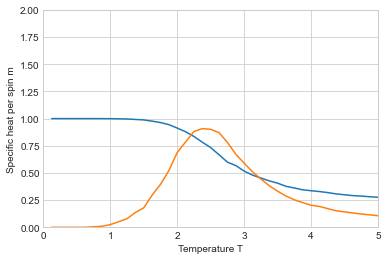

In [29]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T2,M2)
plt.plot(T2,C2)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

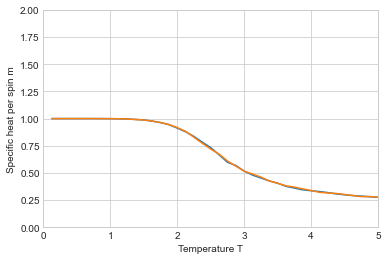

In [30]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T2,M2)
plt.plot(T3,M3)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

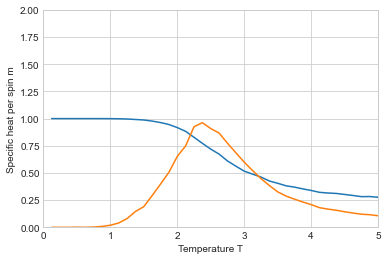

In [31]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T3,M3)
plt.plot(T3,C3)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

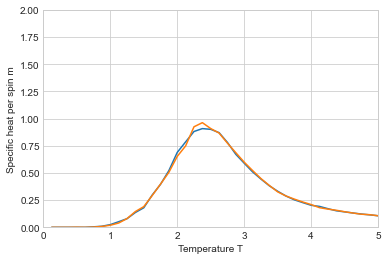

In [32]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T2,C2)
plt.plot(T3,C3)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()